#Examen OPI Anlytics

In [193]:
# 1. ¿Qué pruebas identiﬁcarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.

In [194]:
## En primer lugar obsevar la tabla para darnos una idea de la información con la cual contamos
## 1. Identificar datos faltanes
## 2. Identificar el tipo de datos 
## 3. Identificar si alguna de las variables tiene información errónea, supongamos que en año se encuentran otros caracteres que no corresponden al año
## 4. Realizar un resumen estadístico de los datos

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

df = pd.read_csv("E:/Eli/opi/carpetas_completa_junio_2021.csv")

In [48]:
# Observamos cuántas observaciones y variables tenemos en la base de datos
print(df.shape)

(1248924, 19)


In [49]:
# Observamos las variables incluidas en el DataFrame, en la que podemos ver que por ejemplo la variable tempo no contiene
# información. Por lo que podríamos prescindir de la variable tempo.
print(df)

         ao_hechos mes_hechos         fecha_hechos  ao_inicio mes_inicio  \
0           2016.0      Enero  2016-01-31 22:16:00       2016    Febrero   
1           2016.0      Enero  2016-01-31 20:50:00       2016    Febrero   
2           2016.0    Febrero  2016-02-01 00:30:00       2016    Febrero   
3           2016.0      Enero  2016-01-31 22:00:00       2016    Febrero   
4           2015.0  Diciembre  2015-12-25 12:00:00       2016    Febrero   
...            ...        ...                  ...        ...        ...   
1248919     2021.0      Junio  2021-06-29 17:00:00       2021      Junio   
1248920     2021.0      Junio  2021-06-04 19:00:00       2021      Junio   
1248921     2021.0      Junio  2021-06-30 19:40:00       2021      Junio   
1248922     2021.0       Mayo  2021-05-16 21:08:00       2021      Junio   
1248923     2021.0      Junio  2021-06-29 17:00:00       2021      Junio   

                fecha_inicio  \
0        2016-02-01 00:25:44   
1        2016-02-01 00:

In [50]:
print(df)

         ao_hechos mes_hechos         fecha_hechos  ao_inicio mes_inicio  \
0           2016.0      Enero  2016-01-31 22:16:00       2016    Febrero   
1           2016.0      Enero  2016-01-31 20:50:00       2016    Febrero   
2           2016.0    Febrero  2016-02-01 00:30:00       2016    Febrero   
3           2016.0      Enero  2016-01-31 22:00:00       2016    Febrero   
4           2015.0  Diciembre  2015-12-25 12:00:00       2016    Febrero   
...            ...        ...                  ...        ...        ...   
1248919     2021.0      Junio  2021-06-29 17:00:00       2021      Junio   
1248920     2021.0      Junio  2021-06-04 19:00:00       2021      Junio   
1248921     2021.0      Junio  2021-06-30 19:40:00       2021      Junio   
1248922     2021.0       Mayo  2021-05-16 21:08:00       2021      Junio   
1248923     2021.0      Junio  2021-06-29 17:00:00       2021      Junio   

                fecha_inicio  \
0        2016-02-01 00:25:44   
1        2016-02-01 00:

In [51]:
#Calculamos el porcentaje de nulos en la base de datos
df.isnull().sum()/df.shape[0] *100

ao_hechos                 0.034830
mes_hechos                0.034830
fecha_hechos              0.034830
ao_inicio                 0.000000
mes_inicio                0.000000
fecha_inicio              0.000240
delito                    0.000000
fiscalia                  0.000160
agencia                   0.000000
unidad_investigacion      0.018176
categoria_delito          0.000000
calle_hechos              0.249815
calle_hechos2            60.986737
colonia_hechos            4.104333
alcaldia_hechos           0.279280
competencia              85.199660
longitud                  4.027627
latitud                   4.027627
tempo                   100.000000
dtype: float64

In [52]:
# tempo no contiene información entonces seleccionamos las variables
df=df[['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
 'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
 'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
 'alcaldia_hechos', 'competencia', 'longitud', 'latitud']]


In [53]:
#Observamos con qué variables contamos
print(df.columns.values)

['ao_hechos' 'mes_hechos' 'fecha_hechos' 'ao_inicio' 'mes_inicio'
 'fecha_inicio' 'delito' 'fiscalia' 'agencia' 'unidad_investigacion'
 'categoria_delito' 'calle_hechos' 'calle_hechos2' 'colonia_hechos'
 'alcaldia_hechos' 'competencia' 'longitud' 'latitud']


In [54]:
#Observamos el tipo de variables con las cuales contamos
print(df.dtypes)

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
dtype: object


In [55]:
#2. Identiﬁca los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).
# Primero analizaremos para qué años y qué delegaciones tenemos información

In [56]:
#Observamos que se reportan delitos desde los cuarentas
anios=df.ao_hechos.unique()
anios

array([2016., 2015., 2012., 2014., 2011., 2008., 2006., 2010., 2013.,
       2005., 2009.,   nan, 1955., 2004., 2002., 1998., 1997., 1965.,
       2007., 2000., 1987., 1999., 1956., 2001., 1996., 1986., 1915.,
       1988., 2017., 2003., 1991., 1993., 1977., 1984., 1995., 1994.,
       1990., 1992., 1978., 1989., 1972., 2018., 2019., 1974., 1970.,
       1980., 1976., 1983., 1985., 1966., 1969., 1981., 1960., 1982.,
       1975., 1954., 1973., 1964., 1968., 1963., 1971., 1958., 1942.,
       1930., 1979., 1906., 1962., 1957., 2020., 1950., 1952., 2021.,
       1967.])

In [57]:
#Se observa que a concentración de información se da a partir de 2016, no sabemos
# si anterior a este año quizá no había un sistema de información adecuado y ese
# es el motivo por el que no aparece información (se sugiere investigar por qué falta
# esta información)
df['aux']=1
anio = df.groupby(["ao_hechos"]).agg({'aux':sum})
anio.tail(20)

,aux
ao_hechos,
2002.0,105
2003.0,112
2004.0,163
2005.0,192
2006.0,256
2007.0,314
2008.0,464
2009.0,483
2010.0,885


In [58]:
#Se observa que hay municipios donde sucedieron los delitos, no es exclusivamente de alcaldías, por lo que seleccionaremos 
# las alcaldía de la Ciudad de México
alcaldias=df.groupby(['alcaldia_hechos']).agg({'aux':sum})
alcaldias.head(10)

,aux
alcaldia_hechos,
ABALA,1
ACAMBARO,3
ACAMBAY,4
ACAPULCO DE JUAREZ,70
ACATLAN,3
ACATZINGO,1
ACAXOCHITLAN,1
ACAYUCAN,2
ACOLMAN,26


In [59]:
# Generamos un nuevo DataFrame con las alcaldías de la Cdmx y verificamos que sí se filtraron
alcaldias_cdmx = ["ALVARO OBREGON","AZCAPOTZALCO","BENITO JUAREZ","COYOACAN","CUAJIMALPA DE MORELOS","CUAUHTEMOC",
                       "GUSTAVO A MADERO","IZTACALCO","IZTAPALAPA","LA MAGDALENA CONTRERAS","MIGUEL HIDALGO",
                       "MILPA ALTA","TLAHUAC","TLALPAN","VENUSTIANO CARRANZA","XOCHIMILCO"]

df_cdmx = df[df["alcaldia_hechos"].isin(alcaldias_cdmx)]
alcaldias=df_cdmx.alcaldia_hechos.unique()
alcaldias

array(['BENITO JUAREZ', 'IZTAPALAPA', 'CUAUHTEMOC', 'TLAHUAC',
       'IZTACALCO', 'GUSTAVO A MADERO', 'MIGUEL HIDALGO', 'TLALPAN',
       'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO',
       'CUAJIMALPA DE MORELOS', 'COYOACAN', 'XOCHIMILCO',
       'LA MAGDALENA CONTRERAS', 'MILPA ALTA'], dtype=object)

In [64]:
#Como observamos anterioremente si consideramos años anteiores a 2016, podría traer resultados con interpreraciones no adecuados por no contar
#con la información suficiente, por tal razón filtraremmos la información para los años más robustos
df_mx= df_cdmx[(df_cdmx["ao_hechos"]>2015)&(df_cdmx["ao_hechos"]<=2021)][["delito","ao_hechos","aux"]]

In [65]:
#filtramos los delitos 
delitos = df_cdmx.delito.unique()
delitos.shape

(344,)

In [119]:
df_19= df_mx[(df_mx["ao_hechos"]==2019)][["delito","aux"]]
df_19 = df_19.groupby("delito").count()["aux"]
print(df_19.dtypes)

int64


In [122]:
df_19 = df_19.rename({'aux':'num_19'},axis='columns')
#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis='columns')
df_19.head

<bound method NDFrame.head of delito
ABORTO                                                    133
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA     2170
ABUSO DE CONFIANZA                                       3781
ABUSO SEXUAL                                             3896
ACOSO SEXUAL                                              964
                                                        ...  
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                     4
VIOLACION TUMULTUARIA                                      36
VIOLACION TUMULTUARIA EQUIPARADA                            1
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO               2
VIOLENCIA FAMILIAR                                      25694
Name: aux, Length: 269, dtype: int64>

In [123]:
df_20= df_mx[(df_mx["ao_hechos"]==2020)][["delito","aux"]]
df_20 = df_20.groupby("delito").count()["aux"]
df_20.shape

(282,)

In [124]:
from pandas import DataFrame
df_p=pd.merge(df_19, df_20, on=["delito"])
df_p.shape

(253, 2)

In [125]:
df_p.head

<bound method NDFrame.head of                                                     aux_x  aux_y
delito                                                          
ABORTO                                                133     80
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...   2170   1908
ABUSO DE CONFIANZA                                   3781   3486
ABUSO SEXUAL                                         3896   2894
ACOSO SEXUAL                                          964    917
...                                                   ...    ...
VIOLACION EQUIPARADA POR CONOCIDO                      18     23
VIOLACION EQUIPARADA Y ROBO DE VEHICULO                 4      2
VIOLACION TUMULTUARIA                                  36     26
VIOLACION TUMULTUARIA EQUIPARADA                        1      1
VIOLENCIA FAMILIAR                                  25694  27931

[253 rows x 2 columns]>

In [131]:
#Si solo consideramos el crecimiento en función tal cual la diferencia, observamos delitos con muy pocas observaciones, tendríamos que 
#investigar si los delitos se reclasificaron o por qué suben tanto, para dar una visión más general lo mejor es considerar a los
# delitos que se comportan de una forma similar en ambos años
df_p = df_p.rename({'aux_x':'num_19','aux_y':'num_20'},axis='columns')
df_p['crecimiento']=(df_p.num_20-df_p.num_19)

df_p.sort_values(by='crecimiento',ascending=False)[:10]

,num_19,num_20,crecimiento
delito,,,
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),27,6159,6132
VIOLENCIA FAMILIAR,25694,27931,2237
ENCUBRIMIENTO,12,1718,1706
ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA),6,1440,1434
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA),27,1404,1377
SUSTRACCIÓN DE MENORES,69,1120,1051
"ROBO S/V DENTRO DE NEGOCIOS, AUTOSERVICIOS, CONVENIENCIA",9,961,952
CONTRA LA INTIMIDAD SEXUAL,36,740,704
AMENAZAS,13771,14327,556


In [132]:
df_p_m =df_p[df_p['num_19']>100]

In [133]:
#Con la restricción anterior, observamos que los delitos que más se incrementaron de 2019 a 2020 fueron Violencia Familiar,
# menazas, robo de placas y robo a transeúntes, así como narcomenudeo. Estos delitos son clasificados como delitos de bajo impacto.
#Mientras que para estos años se observó una disminución en el Robo a negocios sin violencia, robo a transeúntes y robo de objetos.

df_p_m.sort_values(by='crecimiento',ascending=False)[:10]

,num_19,num_20,crecimiento
delito,,,
VIOLENCIA FAMILIAR,25694,27931,2237
AMENAZAS,13771,14327,556
ROBO DE PLACA DE AUTOMOVIL,816,1189,373
ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA,327,590,263
PERSONAS EXTRAVIADAS Y AUSENTES,308,476,168
"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COMERCIO Y SUMINISTRO",1040,1192,152
VIOLACION EQUIPARADA,241,369,128
ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA,388,477,89
DDH RELACIONADAS,207,285,78


In [134]:
df_p_m.sort_values(by='crecimiento',ascending=True)[:10]

,num_19,num_20,crecimiento
delito,,,
ROBO A NEGOCIO SIN VIOLENCIA,15753,4443,-11310
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,13272,8618,-4654
ROBO DE OBJETOS,12467,9045,-3422
ROBO A NEGOCIO CON VIOLENCIA,5020,1853,-3167
"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE",5692,2662,-3030
ROBO A CASA HABITACION SIN VIOLENCIA,5938,3457,-2481
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,2387,657,-1730
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,6629,4919,-1710
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA,3776,2335,-1441


In [104]:
#3. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [135]:
delitos_alcaldia = df_cdmx.groupby("alcaldia_hechos").count()["aux"]

In [ ]:
#Las alcaldías que presentan mayor cantidad de delitos son la alcaldía Cuauhtémoc e Iztapalapa. 
#Esto podría deberse a que, por un lado la alcaldía Cuauhtémoc presenta una fuerte dinámica económica, 
#mientras que la delegación Iztapalapa además de presentar niveles de marginación altos, es la delegación 
#con mayor población de la CDMX. Las delegaciones con menores delitos fueron
#Milpa Alta, al ser una alcaldía con menor densidad poblacional se esperaría una menor cantidad de delitos, 
#en segundo lugar se encuentra Cuajimalpa aunque esta alcaldía presenta un fuerte dinamismo económico, 
#es una alcaldía moderna pues se ubican los principales corporativos financieros y empresariales más importante del país,
#por lo que se la seguridad de la zona podría ser mayor.


In [136]:
delitos_alcaldia.sort_values(ascending=False)[:2]


alcaldia_hechos
CUAUHTEMOC    194531
IZTAPALAPA    187860
Name: aux, dtype: int64

In [137]:
delitos_alcaldia.sort_values(ascending=True)[:2]

alcaldia_hechos
MILPA ALTA                8958
CUAJIMALPA DE MORELOS    18525
Name: aux, dtype: int64

In [97]:
#4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

(2758, 2)

In [179]:
df_17= df_cdmx[(df_cdmx["ao_hechos"]==2017)][["delito","mes_hechos","aux"]]

In [180]:
m_17 = df_17.groupby(["mes_hechos"]).count()["aux"]

meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

orden = []
for i in range(len(m_17)):
    for j in range(len(meses)):
        if m_17.keys()[i] == meses[j]:
            orden.append([meses[i],m_17[j]])

m_17 = pd.DataFrame(orden,columns=["mes","delitos"])

Text(0, 0.5, 'Número de delitos')

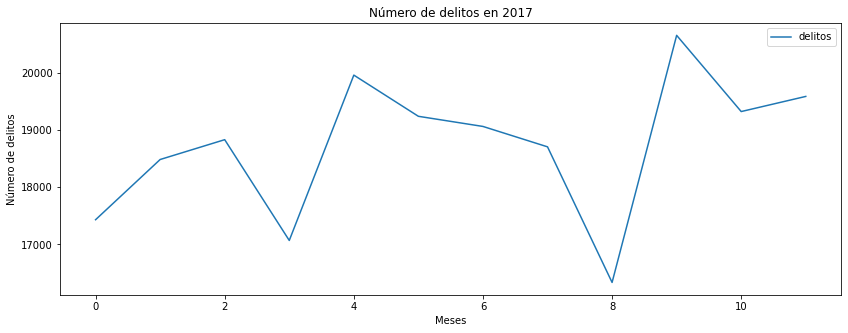

In [181]:
m_17.plot(figsize=(14,5))
plt.title('Número de delitos en 2017')
plt.xlabel('Meses')
plt.ylabel('Número de delitos')

In [168]:
df_18= df_cdmx[(df_cdmx["ao_hechos"]==2018)][["delito","mes_hechos","aux"]]

In [169]:
m_18 = df_18.groupby(["mes_hechos"]).count()["aux"]

meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

orden = []
for i in range(len(m_18)):
    for j in range(len(meses)):
        if m_18.keys()[i] == meses[j]:
            orden.append([meses[i],m_18[j]])

m_18 = pd.DataFrame(orden,columns=["mes","delitos"])

Text(0, 0.5, 'Número de delitos')

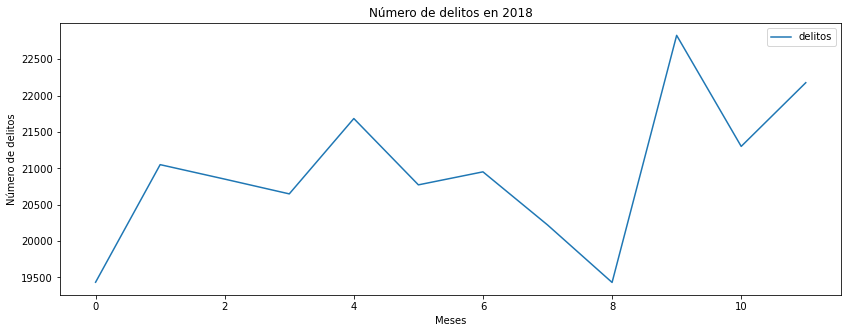

In [170]:
m_18.plot(figsize=(14,5))
plt.title('Número de delitos en 2018')
plt.xlabel('Meses')
plt.ylabel('Número de delitos')

In [155]:
df_19= df_cdmx[(df_cdmx["ao_hechos"]==2019)][["delito","mes_hechos","aux"]]

In [156]:
m_19 = df_19.groupby(["mes_hechos"]).count()["aux"]

meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

orden = []
for i in range(len(m_19)):
    for j in range(len(meses)):
        if m_19.keys()[i] == meses[j]:
            orden.append([meses[i],m_19[j]])

m_19 = pd.DataFrame(orden,columns=["mes","delitos"])

Text(0, 0.5, 'Número de delitos')

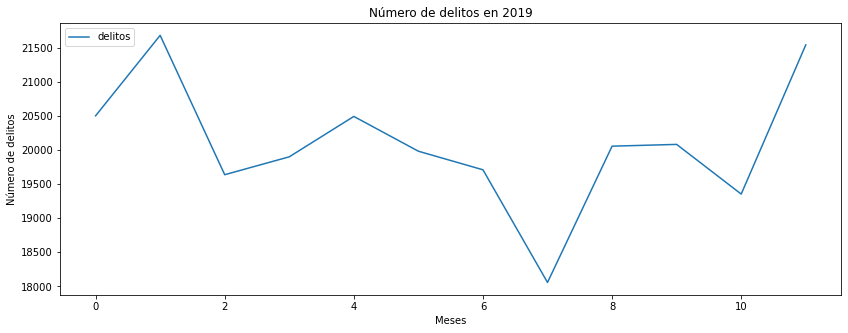

In [157]:
m_19.plot(figsize=(14,5))
plt.title('Número de delitos en 2019')
plt.xlabel('Meses')
plt.ylabel('Número de delitos')

In [141]:
df_20= df_cdmx[(df_cdmx["ao_hechos"]==2020)][["delito","mes_hechos","aux"]]


In [149]:
m_20 = df_20.groupby(["mes_hechos"]).count()["aux"]

meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

orden = []
for i in range(len(m_20)):
    for j in range(len(meses)):
        if m_20.keys()[i] == meses[j]:
            orden.append([meses[i],m_20[j]])

m_20 = pd.DataFrame(orden,columns=["mes","delitos"])

Text(0, 0.5, 'Número de delitos')

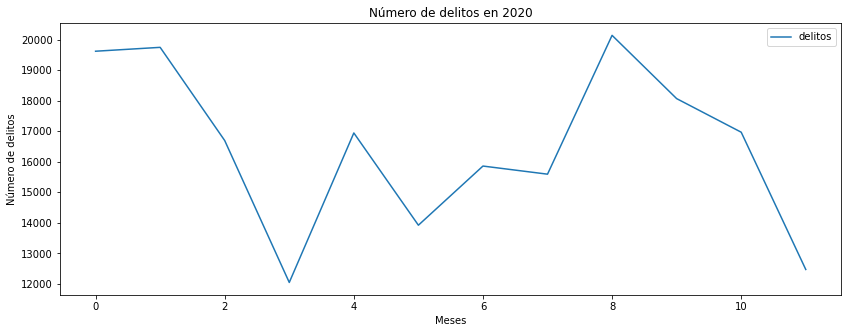

In [171]:
m_20.plot(figsize=(14,5))
plt.title('Número de delitos en 2020')
plt.xlabel('Meses')
plt.ylabel('Número de delitos')

In [195]:
df_21= df_cdmx[(df_cdmx["ao_hechos"]==2021)][["delito","mes_hechos","aux"]]

In [202]:
m_21 = df_21.groupby(["mes_hechos"]).count()["aux"]


meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

orden = []
for i in range(len(m_21)):
    for j in range(len(meses)):
        if m_21.keys()[i] == meses[j]:
            orden.append([meses[i],m_21[j]])

m_21 = pd.DataFrame(orden,columns=["mes","delitos"])

Text(0, 0.5, 'Número de delitos')

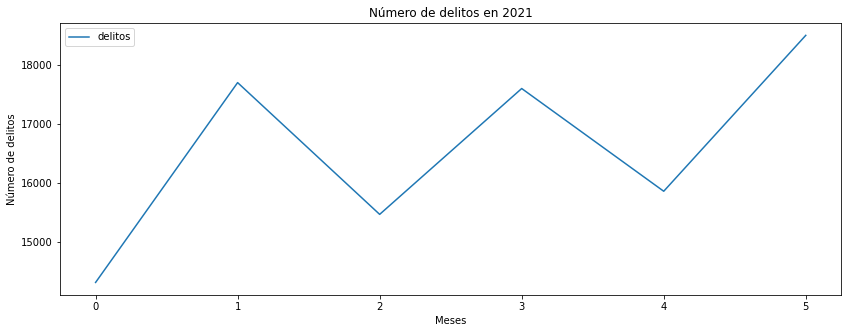

In [203]:
m_21.plot(figsize=(14,5))
plt.title('Número de delitos en 2021')
plt.xlabel('Meses')
plt.ylabel('Número de delitos')

In [174]:
df_g=pd.merge(m_19, m_20, on=["mes"])
df_g = df_g.rename({'delitos_x':'delitos_2019','delitos_y':'delitos_2020'},axis='columns')
df_g.head

<bound method NDFrame.head of            mes  delitos_2019  delitos_2020
0        Enero         20499         19622
1      Febrero         21678         19749
2        Marzo         19636         16695
3        Abril         19898         12045
4         Mayo         20490         16944
5        Junio         19980         13921
6        Julio         19708         15859
7       Agosto         18057         15593
8   Septiembre         20054         20142
9      Octubre         20080         18069
10   Noviembre         19352         16968
11   Diciembre         21538         12470>

In [208]:
df_g1=pd.merge(m_18, df_g, on=["mes"])
df_g1 = df_g1.rename({'delitos':'delitos_2018',},axis='columns')

df_g2=pd.merge(m_17, df_g1, on=["mes"])
df_g2 = df_g2.rename({'delitos':'delitos_2017',},axis='columns')



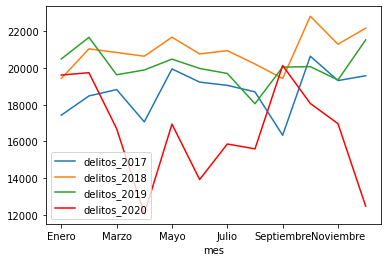

In [209]:
#Se observa claramente que la dinámica de los delitos cambió debido a la pandemia por la COVID-19 en 2020, en los años anteriores se observa
# estacionalidad en mayo y en octubre. En mayo podría deberse al reparto de utilidades en el supuesto de que hay más delincuencia por que
# las personas tienen más ingresos (pensando en delitos como robos) y en octubre supondría que los delincuentes se preparan para contar
# con recursos económicos para fin de año. También en febrero se observa estacionalidad, aquí probablemente sucede que ante la
# cuesta de enero los delincuentes buscan una salida económica. Esta serie sería importante revisarla por los delitos más
# frecuentes como "Violencia Familiar", ya que cuando surgió la pandemia al estar encerrados la violencia contra mujeres aumentó
# según la ONU https://www.unwomen.org/es/news/in-focus/in-focus-gender-equality-in-covid-19-response/violence-against-women-during-covid-19
# si bien la Violencia Familiar podría incluir hombres, en general se ha demostrado que la violencia es hacia la mujer.
ax = plt.gca()
df_g2.plot(kind='line',x='mes',y='delitos_2017',ax=ax)
df_g2.plot(kind='line',x='mes',y='delitos_2018',ax=ax)
df_g2.plot(kind='line',x='mes',y='delitos_2019',ax=ax)
df_g2.plot(kind='line',x='mes',y='delitos_2020', color='red', ax=ax)
plt.show()

In [22]:
#5.¿Cuáles son los delitos que más caracterizan a cada alcaldía? 


In [186]:
#Como se ha observado anterioremente prevalece el el delito de "Violencia Familiar" y "Amenazas" en la mayoría de las alcaldías.
#Sobretodo aquellas donde son habitacionales, por ejemplo las alcaldías de la periferia.
#En alcaldías cuya actividad económica es alta prevalecen delitos como fraude o robo tal es el caso de
# Benito Juárez, Cuauhtemoc y Miguel Hidalgo. 

col_d= df_cdmx.groupby(["alcaldia_hechos","delito"]).agg({'aux':sum})
g = col_d["aux"].groupby('alcaldia_hechos', group_keys=False)
p_d = g.apply(lambda x: x.sort_values(ascending=False).head(3))
p_d

alcaldia_hechos         delito                                        
ALVARO OBREGON          VIOLENCIA FAMILIAR                                 9694
                        AMENAZAS                                           4921
                        FRAUDE                                             4625
AZCAPOTZALCO            VIOLENCIA FAMILIAR                                 6123
                        ROBO A NEGOCIO SIN VIOLENCIA                       4046
                        AMENAZAS                                           3955
BENITO JUAREZ           FRAUDE                                            10277
                        ROBO DE ACCESORIOS DE AUTO                         8346
                        ROBO A NEGOCIO SIN VIOLENCIA                       7847
COYOACAN                VIOLENCIA FAMILIAR                                 8451
                        ROBO DE OBJETOS                                    5663
                        ROBO A NEGOCIO SIN VIOLEN

In [ ]:
#6.	Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado 
#(ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían 
#tomar con el indicador?

In [ ]:
#El indicador que me parece que podría dar una panorama focalizado de la inseguridad en la Ciudad de México es el número de
#delitos por colonia. Con esta información el gobierno de la Ciudad de México podría incrementar la seguridad dn la zona, 
#y establecer sistemas de vigilancia para procurar el bienestar de la población. 
#Y la población podría tomar precauciones cuando va a zonas como la colonia centro.
#Como se observa en nuestro indicador las colonias tradicionalmente con más delitos son la zona Centro,la Doctores, la Colonia 
#del Valle, la Roma y la Narvarte, colonias que concentran actividad económica importante.
# Mientras que colonias como la UNAM donde permanente hay vigilancia y predominan los estudiantes a penas se sucitó un delito,
# O en colonias con un alto nivel económico 


In [187]:
colonias = df_cdmx.groupby(["alcaldia_hechos","colonia_hechos"]).agg({'aux':sum})
colonias.sort_values(by='aux', ascending=False)[:5]


aux
alcaldia_hechos colonia_hechos         
CUAUHTEMOC      CENTRO            40788
                DOCTORES          24157
BENITO JUAREZ   DEL VALLE CENTRO  18053
CUAUHTEMOC      ROMA NORTE        15012
BENITO JUAREZ   NARVARTE          13108

In [189]:
colonias.sort_values(by='aux', ascending=True)[:10]

aux
alcaldia_hechos     colonia_hechos                              
GUSTAVO A MADERO    VALLE GÓMEZ                                1
                    AMPLIACIÓN SIMÓN BOLÍVAR                   1
XOCHIMILCO          LOMAS ESTRELLA 2A SECCION                  1
                    LOS CIPRESES                               1
ALVARO OBREGON      UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO    1
IZTAPALAPA          SAN FRANCISCO CULHUACAN                    1
ALVARO OBREGON      VIVEROS DE COYOACÁN                        1
IZTAPALAPA          PRADO CHURUBUSCO                           1
GUSTAVO A MADERO    DOCTORES                                   1
VENUSTIANO CARRANZA CUCHILLA AGRÍCOLA ORIENTAL                 1

In [ ]:
# Al contar con las coordenadas es posible construir mapa interactivo en el se podría observar número de delitos, por año, tipo
# de delitos y colorearlo de acuerdo a estas variables, por restricciones de tiempo se emite este indicador.